In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def create_toy_data(func, sample_size, std):
    ''' this is a func
    tion to generate the fake data points for testing
    
    :param func: use func to generate a set of x and y
    :param sample_size: how many x and y
    :param std: the generated y will plus a random number, this number is 
                in normal distribution with std.
    :return: return the x and t (t= y + random numbers)
    '''
    
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=sample_size)
    return x, t

def func(x):
    '''
    
    :param x: input the x
    :return: get the y from the mapping of func
    '''
    return np.sin(2*np.pi*x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

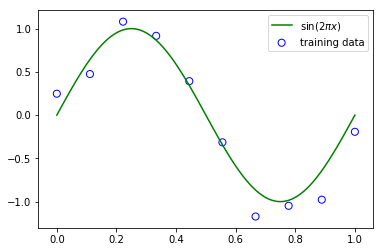

In [4]:
plt.scatter(x_train, y_train, facecolor="none", edgecolors="b", s=50, label="training data")
# facecolor: the color inside
# edgecolor: the color of the
# edge
# s: size of the circle
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
# c: color
plt.legend()
plt.show()

In [18]:
# ===========================================================
# Below is the test of the PolynomialFeature_test() class
# ===========================================================
import itertools
import functools
class PolynomialFeature_test(object):
    """
    polynomial features

    transforms input array with polynomial features

    Example
    =======
    x =
    [[a, b],
    [c, d]]

    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, b, a^2, a * b, b^2],
    [1, c, d, c^2, c * d, d^2]]
    """

    def __init__(self, degree=2):
        """
        construct polynomial features

        Parameters
        ----------
        degree : int
            degree of polynomial
        """
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        """
        transforms input array with polynomial features

        Parameters
        ----------
        x : (sample_size, n) ndarray
            input array

        Returns
        -------
        output : (sample_size, 1 + nC1 + ... + nCd) ndarray
            polynomial features
        """
        if x.ndim == 1:
            # a list with 10 elements
            # print("this is the original x:")
            # print(x)
            # print(x.shape)
            x = x[:, None]
            # a matrix with 10 rows and 1 column
            # print("this is the x, that each row is a list now")
            # print(x)
            # print(x.shape)
        x_t = x.transpose()
        # print(x_t)
        # print(len(x))
        features = [np.ones(len(x))]
        # print("this is initial features")
        # print(features)
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                # get the element from the x_t n (degree) times
                # print("this is the items:")
                # print(items)
                features.append(functools.reduce(lambda x, y: x * y, items))
                # print("this is the features:")
                # print(features)
        return np.asarray(features).transpose()

feature = PolynomialFeature_test(2)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

In [22]:
# ===========================================================
# below is the test of the LinearRegression() class
# ===========================================================

class  Regression_test(object):
    '''
    base function for Regressors
    '''
    def print_out(self):
        print("Jiang")
    pass

class LinearRegression_test(Regression_test):
    """
    Linear regression model
    y = X @ w
    t ~ N(t|X @ w, var)
    """

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        perform least squares fitting

        Parameters
        ----------
        X : (N, D) np.ndarray
            training independent variable
        t : (N,) np.ndarray
            training dependent variable
        """
        self.w = np.linalg.pinv(X) @ t
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X:np.ndarray, return_std:bool=False):
        """
        make prediction given input

        Parameters
        ----------
        X : (N, D) np.ndarray
            samples to predict their output
        return_std : bool, optional
            returns standard deviation of each predition if True

        Returns
        -------
        y : (N,) np.ndarray
            prediction of each sample
        y_std : (N,) np.ndarray
            standard deviation of each predition
        """
        y = X @ self.w
        if return_std:
            y_std = np.sqrt(self.var) + np.zeros_like(y)
            return y, y_std
        return y

model = LinearRegression_test()
# the inheritance of class
model.print_out()
model.fit(X_train, y_train)
y = model.predict(X_test)

Jiang


In [7]:
# =========================================================
# below is the working classes and functions after cleaning
# =========================================================
import itertools
import functools

class PolynomialFeature(object):
    """
    polynomial features

    transforms input array with polynomial features

    Example
    =======
    x =
    [[a, b],
    [c, d]]

    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, b, a^2, a * b, b^2],
    [1, c, d, c^2, c * d, d^2]]
    """

    def __init__(self, degree=2):
        """
        construct polynomial features

        Parameters
        ----------
        degree : int
            degree of polynomial
        """
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        """
        transforms input array with polynomial features

        Parameters
        ----------
        x : (sample_size, n) ndarray
            input array

        Returns
        -------
        output : (sample_size, 1 + nC1 + ... + nCd) ndarray
            polynomial features
        """
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()

In [8]:
class  Regression(object):
    '''
    base function for Regressors
    '''
    pass

class LinearRegression(Regression):
    """
    Linear regression model
    y = X @ w
    t ~ N(t|X @ w, var)
    """

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        perform least squares fitting

        Parameters
        ----------
        X : (N, D) np.ndarray
            training independent variable
        t : (N,) np.ndarray
            training dependent variable
        """
        self.w = np.linalg.pinv(X) @ t
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X:np.ndarray, return_std:bool=False):
        """
        make prediction given input

        Parameters
        ----------
        X : (N, D) np.ndarray
            samples to predict their output
        return_std : bool, optional
            returns standard deviation of each predition if True

        Returns
        -------
        y : (N,) np.ndarray
            prediction of each sample
        y_std : (N,) np.ndarray
            standard deviation of each predition
        """
        y = X @ self.w
        if return_std:
            y_std = np.sqrt(self.var) + np.zeros_like(y)
            return y, y_std
        return y


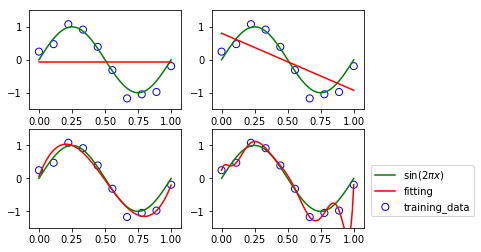

In [9]:
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i+1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    
    plt.scatter(x_train, y_train, facecolor='none', edgecolors='b', s=50, label='training_data')
    plt.plot(x_test, y_test, c='g', label='$\sin(2\pi x)$')
    plt.plot(x_test, y, c='r', label='fitting')
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()
    

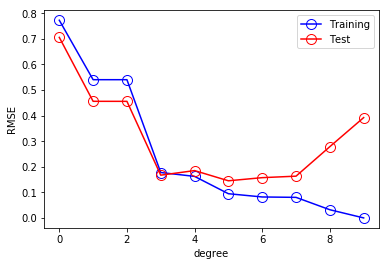

In [10]:
# =========================================================
# Compare the in-sample and out-sample fit
# =========================================================
def rmse(a, b):
    '''
    
    :param a: actual value
    :param b: predicted value
    :return: root mean squared error
    '''
    return np.sqrt(np.mean(np.square(a-b)))

training_errors = []
test_errors = []
x_axis = []
for degree in range(10):
    x_axis.append(degree)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    training_errors.append(rmse(y_hat_train, y_train))
    test_errors.append(rmse(y_hat_test, y_test))

plt.plot(x_axis, training_errors, 'o-', mfc='none', ms=10, c='b', label='Training')
plt.plot(x_axis, test_errors, 'o-', mfc='none', ms=10, c='r', label='Test')
plt.legend()
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.show() 

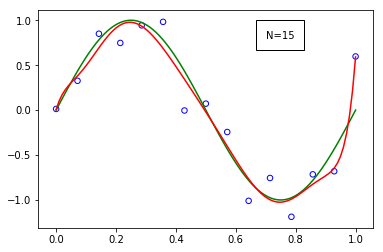

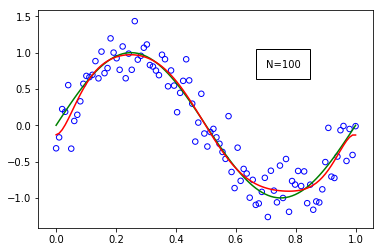

In [15]:
# =========================================================
# overfit problem can be solved by including more data 
# =========================================================

# 15 data points
x_train_15, y_train_15 = create_toy_data(func, 15, 0.25)

feature = PolynomialFeature(9)
X_train_15 = feature.transform(x_train_15)
X_test_15 = feature.transform((x_test))

model_15 = LinearRegression()
model_15.fit(X_train_15, y_train_15)
y_15 = model_15.predict(X_test_15)

plt.scatter(x_train_15, y_train_15, facecolor='none', edgecolors='b', s=30)
plt.plot(x_test, y_test, c='g')
plt.plot(x_test, y_15, c='r')
plt.text(0.7, 0.8, 'N=15', color='black', bbox=dict(facecolor='none', edgecolor='k', pad=10.0))
plt.show()


# 100 data points
x_train_100, y_train_100 = create_toy_data(func, 100, 0.25)

feature = PolynomialFeature(9)
X_train_100 = feature.transform(x_train_100)
X_test_100 = feature.transform((x_test))

model_100 = LinearRegression()
model_100.fit(X_train_100, y_train_100)
y_100 = model_100.predict(X_test_100)

plt.scatter(x_train_100, y_train_100, facecolor='none', edgecolors='b', s=30)
plt.plot(x_test, y_test, c='g')
plt.plot(x_test, y_100, c='r')
plt.text(0.7, 0.8, 'N=100', color='black', bbox=dict(facecolor='none', edgecolor='k', pad=10.0))
plt.show()

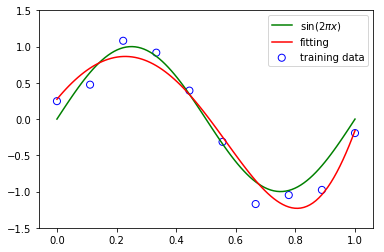

In [16]:
# =========================================================
# Ridge Regression with regularization
# =========================================================
class RidgeRegression(Regression):
    """
    Ridge regression model
    w* = argmin |t - X @ w| + alpha * |w|_2^2
    """

    def __init__(self, alpha:float=1.):
        self.alpha = alpha
    
    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        Ridge regression model
        w* = argmin |t - X @ w| + alpha * |w|_2^2
        """
        eye = np.eye(np.size(X,1))
        self.w = np.linalg.solve(self.alpha * eye + X.T @ X, X.T @ t)
        
    def predict(self, X:np.ndarray):
        """
        Ridge regression model
        w* = argmin |t - X @ w| + alpha * |w|_2^2
        """
        return X @ self.w
        
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.show()

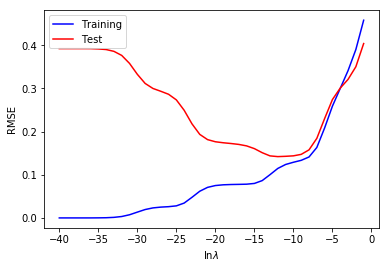

In [23]:
# plot the training and test errors on different regularization lambda
training_errors = []
test_errors = []
ln_lambda = []

for regularization in range(-40, 0, 1):
    alpha_value = np.exp(regularization)
    
    feature = PolynomialFeature(9)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    
    model = RidgeRegression(alpha=alpha_value)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    
    training_errors.append(rmse(y_train, y_hat_train))
    test_errors.append(rmse(y_test, y_hat_test))
    ln_lambda.append(regularization)
    
plt.plot(ln_lambda, training_errors, c="b", label="Training")
plt.plot(ln_lambda, test_errors, c="r", label="Test")
plt.legend()
plt.xlabel("$\ln\lambda$")
plt.ylabel("RMSE")
plt.show()


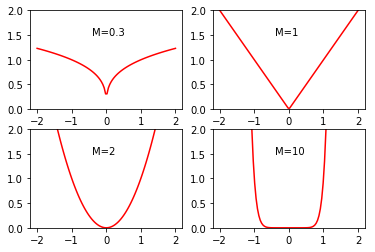

In [35]:
# Information Theory
# PLots of the quantity |y-t|^q for various values of q.

def base_choices(X:np.ndarray, degree:float=1.):
    return np.power(np.abs(X),degree)

# the deviation of y - t
deviation = np.linspace(-2,2,100)

for i, power in enumerate([0.3, 1, 2, 10]):
    plt.subplot(2, 2, i+1)
    deviation_to_power = base_choices(deviation, power)
    plt.plot(deviation, deviation_to_power, c='r')
    plt.ylim(0, 2)
    plt.annotate("M={}".format(power), xy=(-0.4, 1.5))
plt.show()

In [ ]:
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i+1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    
    plt.scatter(x_train, y_train, facecolor='none', edgecolors='b', s=50, label='training_data')
    plt.plot(x_test, y_test, c='g', label='$\sin(2\pi x)$')
    plt.plot(x_test, y, c='r', label='fitting')
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()
    
